In [1]:
import pandas as pd
import numpy as np
import spacy
import string

from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
from wordcloud import wordcloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import win32com.client as win32
import docx2txt
import PyPDF2

Importing React JS developers resume data

In [3]:
reactpath = 'C:\\Users\\Vijaya Lakshmi\\Desktop\\ExcelR_Projects\\Resume_classification\\Resumes\\React'

In [4]:
react = os.listdir(reactpath)
react

['Internship_Ravali_Musquare Technologies (1).docx',
 'Internship_Susovan Bag_Musquare Technologies.docx',
 'React Developer_Deepakreddy.docx',
 'React Developer_Haripriya.docx',
 'React Developer_Kamalakar Reddy.docx',
 'React Developer_Naveen sadhu.docx',
 'React Developer_PavasGoswami.doc',
 'React Developer_Pragnya.docx',
 'React Developer_Sarala Madasu-converted.docx',
 'React Developer_Thirupathiamma.docx',
 'React Developer_Vinay Reddy.doc',
 'React Dev_Krishna Kanth.docx',
 'React Dev_Krishna Kanth_Musquare Technologies.docx',
 'React JS Developer_AnjaniPriyadarshini.doc',
 'React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx',
 'React JS Developer_Venkatalakshmi (1)-converted.docx',
 'Reactjs Developer_kambala sai surendra_Musquare Technologies.docx',
 'Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx',
 'Reactjs Developer_M Lokesh.docx',
 'Reactjs Developer_MD Khizaruddin Rauf _Musquare Technologies.docx',
 'Reactjs Developer_Prabakaran_Musquare Technologie

We have files of .docx, .doc and .pdf formats

In [5]:
# defining filepath and a file in the folder
def get_resume_text(reactpath, file):
    # initializing to process .docx files
    if file.endswith('.docx'):
        # doc_path = os.path.join(reactpath, file)
        text = docx2txt.process(reactpath)
        return text
    

    elif file.endswith('.doc'):

        # Create an instance of the Word application,  It establishes a connection between your Python script and the Word application
        word = win32.gencache.EnsureDispatch('Word.Application')

        # opening doc files
        doc = word.Documents.Open(reactpath)
        #loading the text data
        text = doc.Content.Text
        # closing the opened word doc
        doc.Close()
        return text
    
    # initializing to process .pdf files
    elif file.endswith('.pdf'):
        # loading path to PDF files
        # pdf_path = os.path.join(reactpath, file)
        with open(reactpath, 'rb') as f:

            #using PdfReader class from the PyPDF2 library to read PDF file
            reader = PyPDF2.PdfReader(f)
            #empty string for looping through th pdf using for loop
            text = ""
            for page in reader.pages:
                text += page.extract_text()
        return text
    else:
        return 'unable to find or read .pdf'



In [6]:
data = []
for file_name in os.listdir(reactpath):
    file_path = os.path.join(reactpath, file_name)
    text = get_resume_text(file_path, file_name)
    if text:
        data.append({'category': 'React developers', 'resume': text})

react_df = pd.DataFrame(data)

react_df



,category,resume
0,React developers,Name: Ravali P \n\n\n\n ...
1,React developers,SUSOVAN BAG \n\nSeeking a challenging po...
2,React developers,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...
3,React developers,HARIPRIYA BATTINA \n\nExperience as UI Develop...
4,React developers,KAMALAKAR REDDY. A \n\nLinked In: https://www....
5,React developers,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...
6,React developers,\r\r PROFILE\rSearching for the opportunity ...
7,React developers,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...
8,React developers,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge..."
9,React developers,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...


In [7]:
react_df.shape

(24, 2)

In [8]:
react_df.describe()

,category,resume
count,24,24
unique,1,24
top,React developers,Name: Ravali P \n\n\n\n ...
freq,24,1


Importing Peoplesoft resume data

In [9]:
peoplepath = 'C:\\Users\\Vijaya Lakshmi\\Desktop\\ExcelR_Projects\\Resume_classification\\Resumes\\Peoplesoft resumes'

In [10]:
people = os.listdir(peoplepath)
people

['Peoplesoft Admin_AnubhavSingh.docx',
 'Peoplesoft Admin_G Ananda Rayudu.doc',
 'Peoplesoft Admin_Gangareddy.doc',
 'Peoplesoft Admin_Murali.docx',
 'Peoplesoft Admin_Priyanka Ramadoss.doc',
 'Peoplesoft Admin_SirazuddinMohammad.docx',
 'Peoplesoft Admin_srinivasarao.doc',
 'Peoplesoft Admin_Varkala Vikas.docx',
 'Peoplesoft Admin_Vinod Akkala.doc',
 'PeopleSoft DBA_Ganesh Alladi.doc',
 'PeopleSoft DBA_Vivekanand Sayana.docx',
 'Peoplesoft Finance_Arun Venu.doc',
 'Peoplesoft Finance_Pritam Biswas.doc',
 'Peoplesoft Finance_Rahul Ahuja.doc',
 'Peoplesoft FSCM_HariNarayana.docx',
 'Peoplesoft FSCM_Murali.docx',
 'Peoplesoft FSCM_PriyabrataHota.docx',
 'Peoplesoft FSCM_R Ahmed.doc',
 'Peoplesoft FSCM_SUJATHA.docx',
 'Resume_Subha Santosh_Peoplesoft FSCM.docx']

Folder has only .docx and .doc files

In [11]:
# defining filepath and a file in the folder
def get_resume_text(peoplepath, file):
    # initializing to process .docx files
    if file.endswith('.docx'):
        # doc_path = os.path.join(reactpath, file)
        text = docx2txt.process(peoplepath)
        return text
    

    elif file.endswith('.doc'):

        # Create an instance of the Word application,  It establishes a connection between your Python script and the Word application
        word = win32.gencache.EnsureDispatch('Word.Application')

        # opening doc files
        doc = word.Documents.Open(peoplepath)
        #loading the text data
        text = doc.Content.Text
        # closing the opened word doc
        doc.Close()
        return text
    else:
        return 'unable to find or read .doc'



In [12]:
data = []
for file_name in os.listdir(peoplepath):
    file_path = os.path.join(peoplepath, file_name)
    text = get_resume_text(file_path, file_name)
    if text:
        data.append({'category': 'PeopleSoft', 'resume': text})

people_df = pd.DataFrame(data)

people_df


,category,resume
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...
2,PeopleSoft,PeopleSoft Database Administrator\r ...
3,PeopleSoft,Classification: Internal\n\nClassification: In...
4,PeopleSoft,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo..."
5,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
6,PeopleSoft,PEOPLESOFT ADMINISTRATOR\r\r\rSRINIVAS.K \t\t\...
7,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
8,PeopleSoft,Vinod Akkala ...
9,PeopleSoft,PeopleSoft Admin/PeopleSoft DBA\r\rGanesh All...


In [13]:
people_df.shape

(20, 2)

In [14]:
people_df.describe()

,category,resume
count,20,20
unique,1,20
top,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
freq,20,1


Importing SQL developer data

In [15]:
sqlpath = 'C:\\Users\\Vijaya Lakshmi\\Desktop\\ExcelR_Projects\\Resume_classification\\Resumes\\SQL Developer Lightning insight'

In [16]:
sql = os.listdir(sqlpath)
sql

['Anil kumar.docx',
 'AradhanaTripathi[4_0].docx',
 'Buddha Vamsi.docx',
 'kamballapradeep.docx',
 'Nazeer Basha.doc',
 'Neeraj Mishra.docx',
 'premsai.docx',
 'Priyanka L.doc',
 'PSyamKumar[2_3].docx',
 'Rajupavanakumari[2_10].docx',
 'Ramalakshmi K.docx',
 'RameshNataru[3_4].docx',
 'Tatikonda Kiran Kumar.doc',
 'Vinod B.docx']

Folder has only .docx and .doc files

In [17]:
# defining filepath and a file in the folder
def get_resume_text(sqlpath, file):
    # initializing to process .docx files
    if file.endswith('.docx'):
        # doc_path = os.path.join(reactpath, file)
        text = docx2txt.process(sqlpath)
        return text
    

    elif file.endswith('.doc'):

        # Create an instance of the Word application,  It establishes a connection between your Python script and the Word application
        word = win32.gencache.EnsureDispatch('Word.Application')

        # opening doc files
        doc = word.Documents.Open(sqlpath)
        #loading the text data
        text = doc.Content.Text
        # closing the opened word doc
        doc.Close()
        return text
    else:
        return 'unable to find or read .doc'


In [18]:
data = []
for file_name in os.listdir(sqlpath):
    file_path = os.path.join(sqlpath, file_name)
    text = get_resume_text(file_path, file_name)
    if text:
        data.append({'category': 'SQL developers', 'resume': text})

sql_df = pd.DataFrame(data)

sql_df

,category,resume
0,SQL developers,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...
1,SQL developers,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...
2,SQL developers,BUDDHA VAMSI ...
3,SQL developers,KAMBALLA PRADEEP ...
4,SQL developers,\r\r Hyderabad\rNazeer Basha\rSQL and Power...
5,SQL developers,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...
6,SQL developers,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...
7,SQL developers,SQL SER...
8,SQL developers,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...
9,SQL developers,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...


In [19]:
sql_df.shape

(14, 2)

In [20]:
sql_df.describe()

,category,resume
count,14,14
unique,1,14
top,SQL developers,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...
freq,14,1


Importing Workday resume data

In [21]:
workdaypath = 'C:\\Users\\Vijaya Lakshmi\\Desktop\\ExcelR_Projects\\Resume_classification\\Resumes\\workday resumes'

In [22]:
workday = os.listdir(reactpath)
workday

['Internship_Ravali_Musquare Technologies (1).docx',
 'Internship_Susovan Bag_Musquare Technologies.docx',
 'React Developer_Deepakreddy.docx',
 'React Developer_Haripriya.docx',
 'React Developer_Kamalakar Reddy.docx',
 'React Developer_Naveen sadhu.docx',
 'React Developer_PavasGoswami.doc',
 'React Developer_Pragnya.docx',
 'React Developer_Sarala Madasu-converted.docx',
 'React Developer_Thirupathiamma.docx',
 'React Developer_Vinay Reddy.doc',
 'React Dev_Krishna Kanth.docx',
 'React Dev_Krishna Kanth_Musquare Technologies.docx',
 'React JS Developer_AnjaniPriyadarshini.doc',
 'React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx',
 'React JS Developer_Venkatalakshmi (1)-converted.docx',
 'Reactjs Developer_kambala sai surendra_Musquare Technologies.docx',
 'Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx',
 'Reactjs Developer_M Lokesh.docx',
 'Reactjs Developer_MD Khizaruddin Rauf _Musquare Technologies.docx',
 'Reactjs Developer_Prabakaran_Musquare Technologie

Folder has only .docx and .doc files

In [23]:
# defining filepath and a file in the folder
def get_resume_text(workdaypath, file):
    # initializing to process .docx files
    if file.endswith('.docx'):
        # doc_path = os.path.join(reactpath, file)
        text = docx2txt.process(workdaypath)
        return text
    

    elif file.endswith('.doc'):

        # Create an instance of the Word application,  It establishes a connection between your Python script and the Word application
        word = win32.gencache.EnsureDispatch('Word.Application')

        # opening doc files
        doc = word.Documents.Open(workdaypath)
        #loading the text data
        text = doc.Content.Text
        # closing the opened word doc
        doc.Close()
        return text
    else:
        return 'unable to find or read .pdf'


In [24]:
data = []
for file_name in os.listdir(workdaypath):
    file_path = os.path.join(workdaypath, file_name)
    text = get_resume_text(file_path, file_name)
    if text:
        data.append({'category': 'WorkDay', 'resume': text})

work_df = pd.DataFrame(data)

work_df


,category,resume
0,WorkDay,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
1,WorkDay,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...
2,WorkDay,Hari Krishna M\r\r\rSummary:\rA result oriente...
3,WorkDay,Harikrishna Akula ...
4,WorkDay,HIMA.MENDU\r \r\rCareer Objective\rTo continu...
5,WorkDay,G Himaja\n\n ...
6,WorkDay,\t\t\t\t\t\t\tName:\tJ. Sumanth Royal.\r\t\rP...
7,WorkDay,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...
8,WorkDay,\t\t\t\t\tMadeeswar A\r\t\r\t\rPROFILE SUMMARY...
9,WorkDay,Mooraboyina Guravaiah\n\nWorkday Integration S...


In [25]:
work_df.shape

(21, 2)

In [26]:
work_df.describe()

,category,resume
count,21,21
unique,1,21
top,WorkDay,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
freq,21,1


In [27]:
# Joining all the resume data frames
resume_df = pd.concat([react_df, people_df, sql_df, work_df])
resume_df

,category,resume
0,React developers,Name: Ravali P \n\n\n\n ...
1,React developers,SUSOVAN BAG \n\nSeeking a challenging po...
2,React developers,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...
3,React developers,HARIPRIYA BATTINA \n\nExperience as UI Develop...
4,React developers,KAMALAKAR REDDY. A \n\nLinked In: https://www....
...,...,...
16,WorkDay,\tWorkday Integration Consultant\r\rName ...
17,WorkDay,Srikanth (WORKDAY hCM Consultant)\t ...
18,WorkDay,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
19,WorkDay,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...


In [28]:
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 0 to 20
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  79 non-null     object
 1   resume    79 non-null     object
dtypes: object(2)
memory usage: 1.9+ KB


In [29]:
resume_df.duplicated().sum()

0

In [30]:
resume_df.isnull().sum()

category    0
resume      0
dtype: int64

In [31]:
resume_df.shape

(79, 2)

In [32]:
resume_df.describe()

,category,resume
count,79,79
unique,4,79
top,React developers,Name: Ravali P \n\n\n\n ...
freq,24,1


(array([24.,  0.,  0., 20.,  0.,  0., 14.,  0.,  0., 21.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

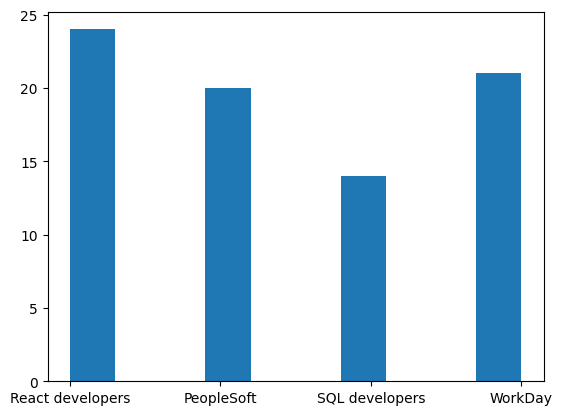

In [33]:
plt.hist(resume_df['category'])

In [34]:
type(resume_df)

pandas.core.frame.DataFrame

In [35]:
# number of words in the resume
r_df =resume_df['resume'].str.len().sum()
r_df

429164

In [36]:
from nltk.tokenize import word_tokenize
import string 
import re


In [37]:
#removing http links
resume_no_link = resume_df["resume"].apply(lambda x: re.sub(r'http\S+', '', x))
resume_no_link

0     Name: Ravali P \n\n\n\n                       ...
1     SUSOVAN  BAG   \n\nSeeking  a  challenging  po...
2     Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...
3     HARIPRIYA BATTINA \n\nExperience as UI Develop...
4     KAMALAKAR REDDY. A \n\nLinked In:  \n\nPROFESS...
                            ...                        
16    \tWorkday Integration Consultant\r\rName      ...
17    Srikanth (WORKDAY hCM Consultant)\t           ...
18    WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
19    Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...
20    Vinay kumar .v\nWorkday Functional Consultant\...
Name: resume, Length: 79, dtype: object

In [38]:
# Splitting the text into individual words or tokens.

resume = resume_no_link.apply(word_tokenize)
resume

0     [Name, :, Ravali, P, Curriculum, Vitae, Specia...
1     [SUSOVAN, BAG, Seeking, a, challenging, positi...
2     [Kanumuru, Deepak, Reddy, CAREER, OBJECTIVE, :...
3     [HARIPRIYA, BATTINA, Experience, as, UI, Devel...
4     [KAMALAKAR, REDDY, ., A, Linked, In, :, PROFES...
                            ...                        
16    [Workday, Integration, Consultant, Name, :, Sr...
17    [Srikanth, (, WORKDAY, hCM, Consultant, ), See...
18    [WORKDAY, |, HCM, |, FCM, Name, :, Kumar, S.S,...
19    [Venkateswarlu.B, Workday, Consultant, Having,...
20    [Vinay, kumar, .v, Workday, Functional, Consul...
Name: resume, Length: 79, dtype: object

In [39]:
# Converting all the words to lower case
low_resume = resume.apply(lambda x: [word.lower() for word in x])
low_resume

0     [name, :, ravali, p, curriculum, vitae, specia...
1     [susovan, bag, seeking, a, challenging, positi...
2     [kanumuru, deepak, reddy, career, objective, :...
3     [haripriya, battina, experience, as, ui, devel...
4     [kamalakar, reddy, ., a, linked, in, :, profes...
                            ...                        
16    [workday, integration, consultant, name, :, sr...
17    [srikanth, (, workday, hcm, consultant, ), see...
18    [workday, |, hcm, |, fcm, name, :, kumar, s.s,...
19    [venkateswarlu.b, workday, consultant, having,...
20    [vinay, kumar, .v, workday, functional, consul...
Name: resume, Length: 79, dtype: object

In [40]:
#removing the stop words for the data
from nltk.corpus import stopwords
stop = stopwords.words('english')

s_word = low_resume.apply(lambda x: [word for word in x if word not in stop])
s_word

0     [name, :, ravali, p, curriculum, vitae, specia...
1     [susovan, bag, seeking, challenging, position,...
2     [kanumuru, deepak, reddy, career, objective, :...
3     [haripriya, battina, experience, ui, developer...
4     [kamalakar, reddy, ., linked, :, professional,...
                            ...                        
16    [workday, integration, consultant, name, :, sr...
17    [srikanth, (, workday, hcm, consultant, ), see...
18    [workday, |, hcm, |, fcm, name, :, kumar, s.s,...
19    [venkateswarlu.b, workday, consultant, 5.3, ye...
20    [vinay, kumar, .v, workday, functional, consul...
Name: resume, Length: 79, dtype: object

In [41]:
import string 
    
# Storing the sets of punctuation in variable result 
result = string.punctuation 
    
# Printing the punctuation values 
print(result) 

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [42]:
no_punc = s_word.apply(lambda x: [word for word in x if word not in result])
no_punc

0     [name, ravali, p, curriculum, vitae, specializ...
1     [susovan, bag, seeking, challenging, position,...
2     [kanumuru, deepak, reddy, career, objective, s...
3     [haripriya, battina, experience, ui, developer...
4     [kamalakar, reddy, linked, professional, summa...
                            ...                        
16    [workday, integration, consultant, name, sri, ...
17    [srikanth, workday, hcm, consultant, seeking, ...
18    [workday, hcm, fcm, name, kumar, s.s, role, wo...
19    [venkateswarlu.b, workday, consultant, 5.3, ye...
20    [vinay, kumar, .v, workday, functional, consul...
Name: resume, Length: 79, dtype: object

In [43]:
# Function to remove symbols from a word
def remove_symbols(word):
    return re.sub(r'[^\w\s]', '', word)
for i in range(2):

# Remove symbols and single-letter words, looping the code to run twice for clear data
    punch = no_punc.apply(lambda x: [remove_symbols(word) for word in x if len(word) > 1])
punch

0     [name, ravali, curriculum, vitae, specializati...
1     [susovan, bag, seeking, challenging, position,...
2     [kanumuru, deepak, reddy, career, objective, s...
3     [haripriya, battina, experience, ui, developer...
4     [kamalakar, reddy, linked, professional, summa...
                            ...                        
16    [workday, integration, consultant, name, sri, ...
17    [srikanth, workday, hcm, consultant, seeking, ...
18    [workday, hcm, fcm, name, kumar, ss, role, wor...
19    [venkateswarlub, workday, consultant, 53, year...
20    [vinay, kumar, v, workday, functional, consult...
Name: resume, Length: 79, dtype: object

In [44]:
# Join the tokenized, punctuation-removed resume data
clean = punch. apply(' '.join)

In [45]:
clean

0     name ravali curriculum vitae specialization co...
1     susovan bag seeking challenging position field...
2     kanumuru deepak reddy career objective secure ...
3     haripriya battina experience ui developer reac...
4     kamalakar reddy linked professional summary ye...
                            ...                        
16    workday integration consultant name sri krishn...
17    srikanth workday hcm consultant seeking suitab...
18    workday hcm fcm name kumar ss role workday con...
19    venkateswarlub workday consultant 53 years exp...
20    vinay kumar v workday functional consultant ex...
Name: resume, Length: 79, dtype: object

In [46]:
# we can oberve that there is more space in between few words, passing lambda function to clear them
cleaned = clean.apply(lambda x: re.sub(' +', ' ', x))
cleaned

0     name ravali curriculum vitae specialization co...
1     susovan bag seeking challenging position field...
2     kanumuru deepak reddy career objective secure ...
3     haripriya battina experience ui developer reac...
4     kamalakar reddy linked professional summary ye...
                            ...                        
16    workday integration consultant name sri krishn...
17    srikanth workday hcm consultant seeking suitab...
18    workday hcm fcm name kumar ss role workday con...
19    venkateswarlub workday consultant 53 years exp...
20    vinay kumar v workday functional consultant ex...
Name: resume, Length: 79, dtype: object

In [47]:
cleaned_data = pd.DataFrame({'category': resume_df['category'], "clean_resume" : cleaned})
cleaned_data

,category,clean_resume
0,React developers,name ravali curriculum vitae specialization co...
1,React developers,susovan bag seeking challenging position field...
2,React developers,kanumuru deepak reddy career objective secure ...
3,React developers,haripriya battina experience ui developer reac...
4,React developers,kamalakar reddy linked professional summary ye...
...,...,...
16,WorkDay,workday integration consultant name sri krishn...
17,WorkDay,srikanth workday hcm consultant seeking suitab...
18,WorkDay,workday hcm fcm name kumar ss role workday con...
19,WorkDay,venkateswarlub workday consultant 53 years exp...


In [48]:
cle = cleaned.str.len().sum()
cle

336820

In [49]:
cleaned_data_count = pd.DataFrame({
    'Category':['actual word count ', 
                'cleaned word count',
        '**words removed**'] ,
        'Count':[r_df, cle, (int(r_df)- int(cle))]})
cleaned_data_count

,Category,Count
0,actual word count,429164
1,cleaned word count,336820
2,**words removed**,92344


In [50]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Vijaya
[nltk_data]     Lakshmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()    
stemmed_tokens = [ps.stem(word) for word in cleaned]
print(stemmed_tokens[0:10])

['name ravali curriculum vitae specialization computer science engg ee ob je ct ee ob je ct utilize technical skills achieving target developing best performance organization ion ion degreecourse collegeinstitute university board percentage cgpa year passing cgpacgpa institute technology vtu 65 cgpa 2021 diploma aryabharathi polytechnic karnataka state board technical examination bengaluru 60 2017 sslc empress girls high school karnataka secondary education board 528 2011 manual testing skills strong knowledge sdlc concepts extensive knowledge white box testing good knowledge functional testing integration testing extreme knowledge system testing good knowledge adhoc testing reliability testing good knowledge exploratory testing good knowledge stlc concepts good knowledge test cases test scenarios good knowledge globalization testing compatibility testing knowledge regression testing good knowledge test plan ql goo rd oo ct io goo ing s goo ow dg goo bq s xt io ql goo rd oo ct io goo i

In [52]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm') 

In [53]:
#lemmatization
s_lemm = nlp(''.join(str(stemmed_tokens)))
lemming = [token.lemma_ for token in s_lemm]
lemming

['[',
 "'",
 'name',
 'ravali',
 'curriculum',
 'vitae',
 'specialization',
 'computer',
 'science',
 'engg',
 'ee',
 'ob',
 'je',
 'ct',
 'ee',
 'ob',
 'je',
 'ct',
 'utilize',
 'technical',
 'skill',
 'achieve',
 'target',
 'develop',
 'good',
 'performance',
 'organization',
 'ion',
 'ion',
 'degreecourse',
 'collegeinstitute',
 'university',
 'board',
 'percentage',
 'cgpa',
 'year',
 'pass',
 'cgpacgpa',
 'institute',
 'technology',
 'vtu',
 '65',
 'cgpa',
 '2021',
 'diploma',
 'aryabharathi',
 'polytechnic',
 'karnataka',
 'state',
 'board',
 'technical',
 'examination',
 'bengaluru',
 '60',
 '2017',
 'sslc',
 'empress',
 'girl',
 'high',
 'school',
 'karnataka',
 'secondary',
 'education',
 'board',
 '528',
 '2011',
 'manual',
 'testing',
 'skill',
 'strong',
 'knowledge',
 'sdlc',
 'concept',
 'extensive',
 'knowledge',
 'white',
 'box',
 'test',
 'good',
 'knowledge',
 'functional',
 'testing',
 'integration',
 'testing',
 'extreme',
 'knowledge',
 'system',
 'test',
 'good',


In [54]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(lemming)
print(matrix.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [55]:
vectorizer.vocabulary_

{'name': 2730,
 'ravali': 3340,
 'curriculum': 1246,
 'vitae': 4348,
 'specialization': 3799,
 'computer': 1075,
 'science': 3615,
 'engg': 1575,
 'ee': 1510,
 'ob': 2829,
 'je': 2282,
 'ct': 1234,
 'utilize': 4272,
 'technical': 4033,
 'skill': 3751,
 'achieve': 404,
 'target': 4011,
 'develop': 1384,
 'good': 1898,
 'performance': 3029,
 'organization': 2907,
 'ion': 2246,
 'degreecourse': 1329,
 'collegeinstitute': 1029,
 'university': 4231,
 'board': 809,
 'percentage': 3026,
 'cgpa': 952,
 'year': 4495,
 'pass': 2984,
 'cgpacgpa': 953,
 'institute': 2189,
 'technology': 4047,
 'vtu': 4373,
 '65': 260,
 '2021': 171,
 'diploma': 1413,
 'aryabharathi': 626,
 'polytechnic': 3100,
 'karnataka': 2336,
 'state': 3874,
 'examination': 1640,
 'bengaluru': 772,
 '60': 248,
 '2017': 155,
 'sslc': 3849,
 'empress': 1558,
 'girl': 1871,
 'high': 2000,
 'school': 3613,
 'secondary': 3635,
 'education': 1507,
 '528': 235,
 '2011': 135,
 'manual': 2523,
 'testing': 4071,
 'strong': 3905,
 'knowle

In [56]:
unique_words = pd.DataFrame(vectorizer.vocabulary_, columns = vectorizer.vocabulary_.keys(), index = ['Count_vectorizer']).T
unique_words

,Count_vectorizer
name,2730
ravali,3340
curriculum,1246
vitae,4348
specialization,3799
...,...
roughly,3547
seven,3682
vietnam,4327
300,201


In [57]:
unique_words.shape

(4514, 1)

There are 4514 unique words in the data

In [58]:
from nltk import FreqDist
freq_dist = FreqDist(lemming)
common_words = freq_dist.most_common(10)
for word, count in common_words:
    print(word)

experience
application
report
use
work
server
peoplesoft
workday
create
project


In [59]:
#extracting the most common words in the corpus 
set_stopwords = set(stopwords.words('english')+(['''''',"''"]))
total_words = []
sentences = lemming
clean_sentences = ""
for records in sentences:
    clean_sentences += records
    req_words = nltk.word_tokenize(records)
    for word in req_words:
        if word not in set_stopwords and word not in string.punctuation:
            total_words.append(word)
wordfreqdist = nltk.FreqDist(total_words)
mostcommon = wordfreqdist.most_common(100)


In [60]:
mostcommon

[('experience', 633),
 ('application', 531),
 ('report', 527),
 ('use', 503),
 ('work', 488),
 ('server', 479),
 ('peoplesoft', 446),
 ('workday', 426),
 ('create', 380),
 ('project', 379),
 ('integration', 367),
 ('database', 301),
 ('process', 296),
 ('system', 274),
 ('business', 272),
 ('datum', 269),
 ('sql', 242),
 ('web', 241),
 ('tool', 238),
 ('design', 233),
 ('support', 227),
 ('client', 223),
 ('role', 218),
 ('good', 213),
 ('knowledge', 211),
 ('develop', 206),
 ('environment', 202),
 ('requirement', 201),
 ('service', 199),
 ('involve', 198),
 ('team', 188),
 ('skill', 184),
 ('like', 180),
 ('hcm', 173),
 ('development', 164),
 ('people', 160),
 ('technology', 159),
 ('change', 154),
 ('technical', 153),
 ('user', 152),
 ('developer', 149),
 ('various', 146),
 ('responsibility', 145),
 ('domain', 144),
 ('test', 140),
 ('issue', 140),
 ('oracle', 136),
 ('security', 135),
 ('management', 134),
 ('eib', 133),
 ('production', 131),
 ('maintain', 129),
 ('studio', 129),
 (

In [61]:
one_block = ' '.join(cleaned)  # Convert list of words to a string
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:])

['curriculum', 'vitae', 'specialization', 'computer', 'science', 'utilize', 'skills', 'achieving', 'target', 'developing', 'performance', 'organization', 'ion', 'ion', 'board', 'percentage', 'year', 'passing', 'cgpa', 'diploma', 'aryabharathi', 'examination', 'girls', 'school', 'testing', 'skills', 'knowledge', 'sdlc', 'concepts', 'knowledge', 'testing', 'knowledge', 'testing', 'integration', 'testing', 'knowledge', 'system', 'testing', 'knowledge', 'testing', 'reliability', 'testing', 'knowledge', 'testing', 'knowledge', 'concepts', 'knowledge', 'test', 'cases', 'test', 'scenarios', 'knowledge', 'globalization', 'testing', 'compatibility', 'testing', 'knowledge', 'regression', 'testing', 'knowledge', 'test', 'methdology', 'knowledge', 'scrum', 'methodology', 'expertise', 'sprint', 'planning', 'meeting', 'knowledge', 'scrum', 'meeting', 'knowledge', 'sprint', 'meeting', 'knowledge', 'product', 'backlog', 'meeting', 'bug', 'triage', 'meeting', 'knowledge', 'normalization', 'skills', 'kn

In [62]:
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)  ## style='ent' to highlight text

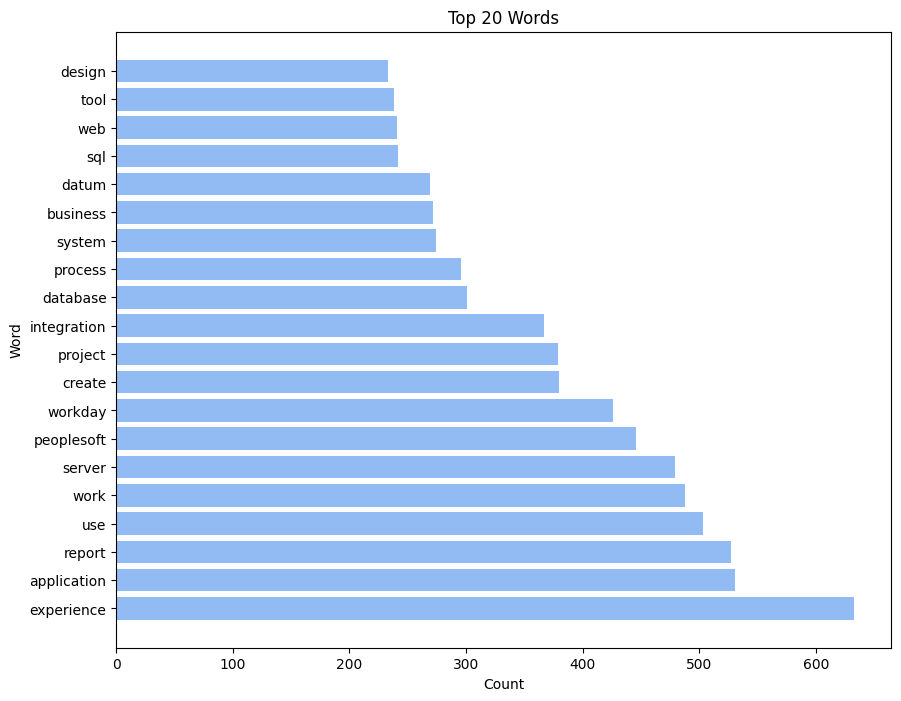

In [63]:
import matplotlib.pyplot as plt

# Extract the top 20 words and their counts from the mostcommon list
top_words = [word for word, count in mostcommon[:20]]
word_counts = [count for word, count in mostcommon[:20]]

# Plot the top 20 words
plt.figure(figsize=(10, 8))
plt.barh(top_words, word_counts, color='#91BBF2')
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 20 Words')
plt.show()

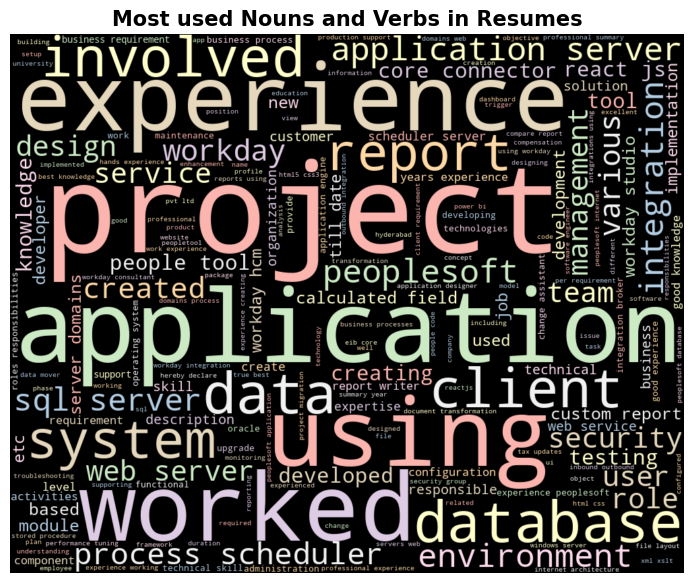

In [64]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create word cloud
wordcloud = WordCloud(width=1000, height=800, random_state=10,background_color='black', colormap="Pastel1").generate(str(doc_block))

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [65]:
cleaned_data

,category,clean_resume
0,React developers,name ravali curriculum vitae specialization co...
1,React developers,susovan bag seeking challenging position field...
2,React developers,kanumuru deepak reddy career objective secure ...
3,React developers,haripriya battina experience ui developer reac...
4,React developers,kamalakar reddy linked professional summary ye...
...,...,...
16,WorkDay,workday integration consultant name sri krishn...
17,WorkDay,srikanth workday hcm consultant seeking suitab...
18,WorkDay,workday hcm fcm name kumar ss role workday con...
19,WorkDay,venkateswarlub workday consultant 53 years exp...


In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(sublinear_tf=True,stop_words='english')


x = tfidf.fit_transform(cleaned_data['clean_resume'])
y =cleaned_data['category']

In [67]:
cleaned_data['category']

0     React developers
1     React developers
2     React developers
3     React developers
4     React developers
            ...       
16             WorkDay
17             WorkDay
18             WorkDay
19             WorkDay
20             WorkDay
Name: category, Length: 79, dtype: object

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1, test_size=0.33)

In [69]:
x_train

<52x5126 sparse matrix of type '<class 'numpy.float64'>'
	with 13307 stored elements in Compressed Sparse Row format>

In [70]:
x_train

<52x5126 sparse matrix of type '<class 'numpy.float64'>'
	with 13307 stored elements in Compressed Sparse Row format>

In [71]:
x_train.shape, x_test.shape

((52, 5126), (27, 5126))

1. Logistic regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

models_logreg = []

# Define parameters
C_values = [0.1, 1, 5, 10, 20, 30]

# Create and train the Logistic Regression models
results = []
for C in C_values:
    logreg = LogisticRegression(C=C, random_state=1)
    logreg.fit(x_train, y_train)
    models_logreg.append(logreg)
    
    # Generate classification report for the model
    y_pred = logreg.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy_train = logreg.score(x_train, y_train)
    accuracy_test = report['accuracy']
    recall = report['macro avg']['recall']
    results.append({'Model': logreg, 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'Recall': recall})

# Create DataFrame from results
df_logreg = pd.DataFrame(results)
# Sort DataFrame by Recall in descending order
df_logreg_sorted = df_logreg.sort_values(by=['Recall', 'Test Accuracy', 'Train Accuracy'], ascending=False)

# Print the sorted DataFrame
df_logreg_sorted

,Model,Train Accuracy,Test Accuracy,Recall
2,"LogisticRegression(C=5, random_state=1)",1.000000,0.962963,0.950000
3,"LogisticRegression(C=10, random_state=1)",1.000000,0.962963,0.950000
4,"LogisticRegression(C=20, random_state=1)",1.000000,0.962963,0.950000
5,"LogisticRegression(C=30, random_state=1)",1.000000,0.962963,0.950000
1,"LogisticRegression(C=1, random_state=1)",1.000000,0.666667,0.661111
0,"LogisticRegression(C=0.1, random_state=1)",0.384615,0.148148,0.250000


In [73]:
# used for creating data frame at the end
top_logreg = df_logreg_sorted[:2]

In [74]:
model_index = 2
log_best_model = models_logreg[model_index]
log_best_model

LogisticRegression(C=5, random_state=1)

In [75]:
log_r = LogisticRegression(C=5, random_state=1)
log_r.fit(x_train, y_train)
y_log = log_r.predict(x_test)
print(classification_report(y_test, y_log))

                  precision    recall  f1-score   support

      PeopleSoft       1.00      1.00      1.00         9
React developers       0.80      1.00      0.89         4
  SQL developers       1.00      0.80      0.89         5
         WorkDay       1.00      1.00      1.00         9

        accuracy                           0.96        27
       macro avg       0.95      0.95      0.94        27
    weighted avg       0.97      0.96      0.96        27



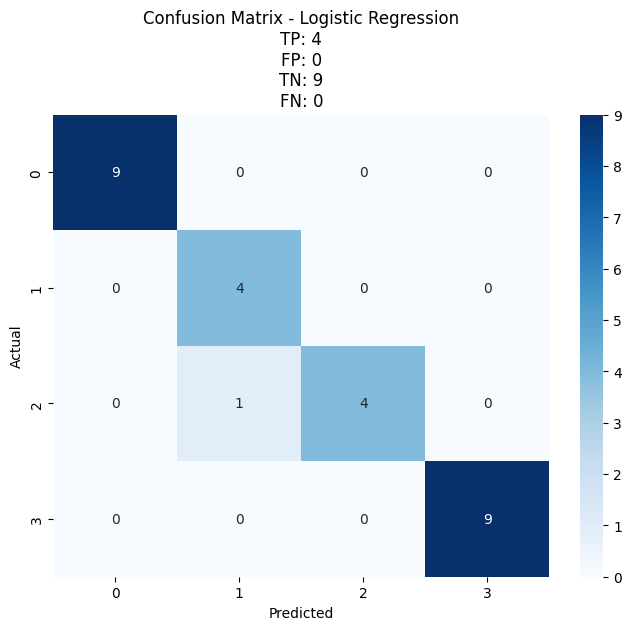

In [76]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm_log = confusion_matrix(y_test, y_log)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')

# Get TP, FP, TN, FN values
tp = cm_log[1, 1]
fp = cm_log[0, 1]
tn = cm_log[0, 0]
fn = cm_log[1, 0]

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))

# Display the plot
plt.show()

2. Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import pandas as pd

models_DT = []

# Define parameters
max_depths = [3, 4, 5, 6, 7]
max_features = ['sqrt', 'log2', None]
min_samples_leafs = [1, 2, 3, 5, 10]
max_leaf_nodes = [5, 10, 15, 20]

# Create and train the decision tree models
results = []
for max_depth in max_depths:
    for max_feature in max_features:
        for min_samples_leaf in min_samples_leafs:
            for max_leaf_node in max_leaf_nodes:
                DT = DecisionTreeClassifier(criterion='gini', max_depth=max_depth,
                                               max_features=max_feature, min_samples_leaf=min_samples_leaf,
                                               max_leaf_nodes=max_leaf_node, random_state=1)
                DT.fit(x_train, y_train)
                models_DT.append(DT)
                
                # Generate classification report for the model
                y_pred = DT.predict(x_test)
                report = classification_report(y_test, y_pred, output_dict=True)
                accuracy_train = DT.score(x_train, y_train)
                accuracy_test = report['accuracy']
                recall = report['macro avg']['recall']
                results.append({'Model': DT, 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'Recall': recall})

# Create DataFrame from results
df_DT = pd.DataFrame(results)
# Sort DataFrame by Recall in descending order
df_DT_sorted = df_DT.sort_values(by=['Recall', 'Test Accuracy', 'Train Accuracy'], ascending=False)

# Print the sorted DataFrame
df_DT_sorted[:5]

,Model,Train Accuracy,Test Accuracy,Recall
40,"DecisionTreeClassifier(max_depth=3, max_leaf_n...",0.942308,0.925926,0.944444
41,"DecisionTreeClassifier(max_depth=3, max_leaf_n...",0.942308,0.925926,0.944444
42,"DecisionTreeClassifier(max_depth=3, max_leaf_n...",0.942308,0.925926,0.944444
43,"DecisionTreeClassifier(max_depth=3, max_leaf_n...",0.942308,0.925926,0.944444
44,"DecisionTreeClassifier(max_depth=3, max_leaf_n...",0.942308,0.925926,0.944444


In [78]:
model_index = 299
DT_best = models_DT[model_index]
DT_best

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20, min_samples_leaf=10,
                       random_state=1)

In [79]:
df_dt = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20, min_samples_leaf=10,random_state=1)
df_dt.fit(x_train,y_train)
y_dt = df_dt.predict(x_test)
print(classification_report(y_test,y_dt))

                  precision    recall  f1-score   support

      PeopleSoft       1.00      0.78      0.88         9
React developers       1.00      1.00      1.00         4
  SQL developers       0.71      1.00      0.83         5
         WorkDay       1.00      1.00      1.00         9

        accuracy                           0.93        27
       macro avg       0.93      0.94      0.93        27
    weighted avg       0.95      0.93      0.93        27



In [80]:
top_DT = df_DT_sorted[:2]

Text(0.5, 1.0, 'Confusion Matrix - Decision Tree\nTP: 4\nFP: 0\nTN: 7\nFN: 0')

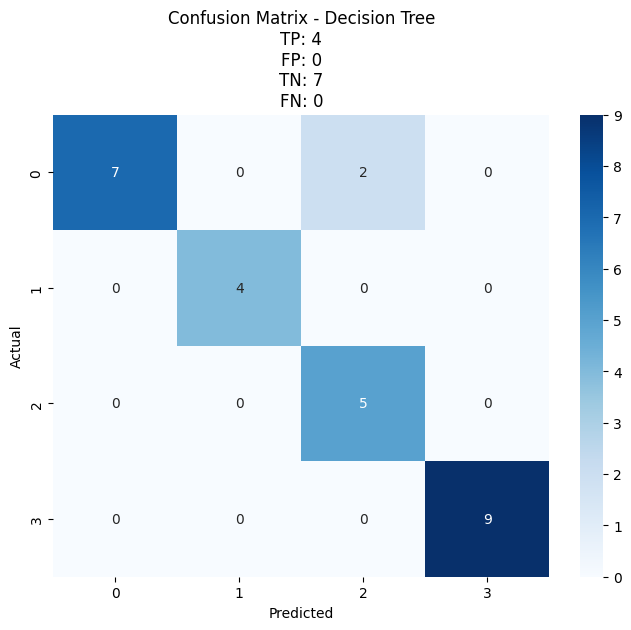

In [81]:
cm_DT = confusion_matrix(y_test, y_dt)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_DT, annot=True, fmt='d', cmap='Blues')

# Get TP, FP, TN, FN values
tp = cm_DT[1, 1]
fp = cm_DT[0, 1]
tn = cm_DT[0, 0]
fn = cm_DT[1, 0]

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))


3. Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

models_RF = []

# Define parameters
n_estimators = [50, 100, 150]
max_depths = [5, 10, 15]
min_samples_leafs = [1, 2, 3]
max_features = ['sqrt', 'log2']

# Create and train the RandomForestClassifier models
results = []
for n_estimator in n_estimators:
    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leafs:
            for max_feature in max_features:
                RF = RandomForestClassifier(n_estimators=n_estimator, max_depth=max_depth,
                                            min_samples_leaf=min_samples_leaf, max_features=max_feature,
                                            random_state=1)
                RF.fit(x_train, y_train)
                models_RF.append(RF)
                
                # Generate classification report for the model
                y_pred = RF.predict(x_test)
                report = classification_report(y_test, y_pred, output_dict=True)
                accuracy_train = RF.score(x_train, y_train)
                accuracy_test = report['accuracy']
                recall = report['macro avg']['recall']
                results.append({'Model': str(RF), 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'Recall': recall})

# Create DataFrame from results
df_RF = pd.DataFrame(results)
# Sort DataFrame by Recall in descending order
df_RF_sorted = df_RF.sort_values(by=['Recall', 'Test Accuracy', 'Train Accuracy'], ascending=False)

# Print the sorted DataFrame
df_RF_sorted[:5]


,Model,Train Accuracy,Test Accuracy,Recall
8,"RandomForestClassifier(max_depth=10, min_sampl...",1.0,0.962963,0.972222
14,"RandomForestClassifier(max_depth=15, min_sampl...",1.0,0.962963,0.972222
4,"RandomForestClassifier(max_depth=5, min_sample...",1.0,0.962963,0.950000
10,"RandomForestClassifier(max_depth=10, min_sampl...",1.0,0.962963,0.950000
16,"RandomForestClassifier(max_depth=15, min_sampl...",1.0,0.962963,0.950000


In [83]:
model_index = 8
RFC_best_model = models_RF[model_index]
RFC_best_model

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=50,
                       random_state=1)

In [84]:
rf_verify= RFC_best_model
rf_verify.fit(x_train, y_train)
y_rfc = rf_verify.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_rfc))

                  precision    recall  f1-score   support

      PeopleSoft       1.00      0.89      0.94         9
React developers       0.80      1.00      0.89         4
  SQL developers       1.00      1.00      1.00         5
         WorkDay       1.00      1.00      1.00         9

        accuracy                           0.96        27
       macro avg       0.95      0.97      0.96        27
    weighted avg       0.97      0.96      0.96        27



In [85]:
top_RF = df_RF_sorted[:2]

Text(0.5, 1.0, 'Confusion Matrix - RandomForestClassifier\nTP: 4\nFP: 1\nTN: 8\nFN: 0')

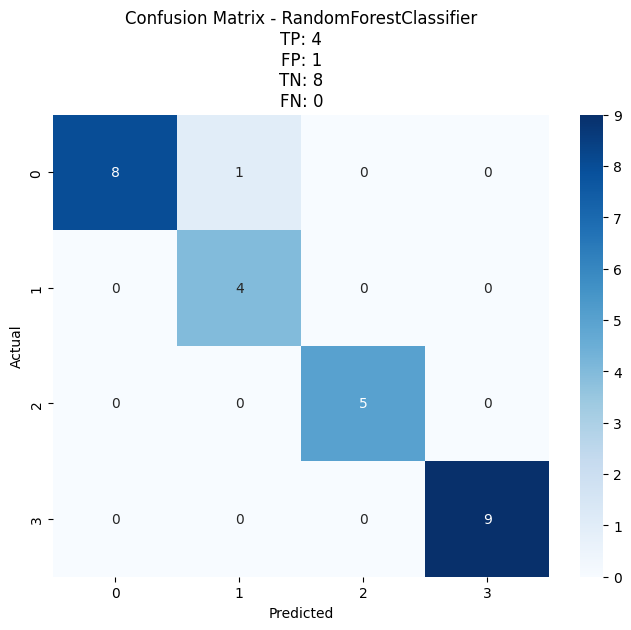

In [86]:
cm_RFC = confusion_matrix(y_test, y_rfc)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_RFC, annot=True, fmt='d', cmap='Blues')

# Get TP, FP, TN, FN values
tp = cm_RFC[1, 1]
fp = cm_RFC[0, 1]
tn = cm_RFC[0, 0]
fn = cm_RFC[1, 0]

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - RandomForestClassifier\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))


4. Ada Boost

In [87]:
from sklearn.ensemble import AdaBoostClassifier


models_ada = []

# Define parameters
n_estimators = [50, 100, 200, 500, 1000]
learning_rates = [0.1,0.33, 0.5, 1.0]

# Create and train the AdaBoostClassifier models
results = []
for n_estimator in n_estimators:
    for learning_rate in learning_rates:
        ada = AdaBoostClassifier(n_estimators=n_estimator, learning_rate=learning_rate, random_state=1)
        ada.fit(x_train, y_train)
        models_ada.append(ada)
        
        # Generate classification report for the model
        y_pred = ada.predict(x_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy_train = ada.score(x_train, y_train)
        accuracy_test = report['accuracy']
        recall = report['macro avg']['recall']
        results.append({'Model': str(ada), 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'Recall': recall})

# Create DataFrame from results
df_ada = pd.DataFrame(results)
# Sort DataFrame by Recall in descending order
df_ada_sorted = df_ada.sort_values(by=['Recall', 'Test Accuracy', 'Train Accuracy'], ascending=False)

# Print the sorted DataFrame
df_ada_sorted[:5]

,Model,Train Accuracy,Test Accuracy,Recall
0,"AdaBoostClassifier(learning_rate=0.1, random_s...",1.0,1.0,1.0
1,"AdaBoostClassifier(learning_rate=0.33, random_...",1.0,1.0,1.0
4,"AdaBoostClassifier(learning_rate=0.1, n_estima...",1.0,1.0,1.0
5,"AdaBoostClassifier(learning_rate=0.33, n_estim...",1.0,1.0,1.0
8,"AdaBoostClassifier(learning_rate=0.1, n_estima...",1.0,1.0,1.0


In [88]:
model_index = 0
ada_best_model = models_ada[model_index]
ada_best_model

AdaBoostClassifier(learning_rate=0.1, random_state=1)

In [89]:
#verification
ada = AdaBoostClassifier(learning_rate=0.1, random_state=1)
ada.fit(x_train, y_train)
y_ada = ada.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_ada))

                  precision    recall  f1-score   support

      PeopleSoft       1.00      1.00      1.00         9
React developers       1.00      1.00      1.00         4
  SQL developers       1.00      1.00      1.00         5
         WorkDay       1.00      1.00      1.00         9

        accuracy                           1.00        27
       macro avg       1.00      1.00      1.00        27
    weighted avg       1.00      1.00      1.00        27



In [90]:
top_ada = df_ada_sorted[:2]

Text(0.5, 1.0, 'Confusion Matrix - AdaBoost\nTP: 4\nFP: 0\nTN: 9\nFN: 0')

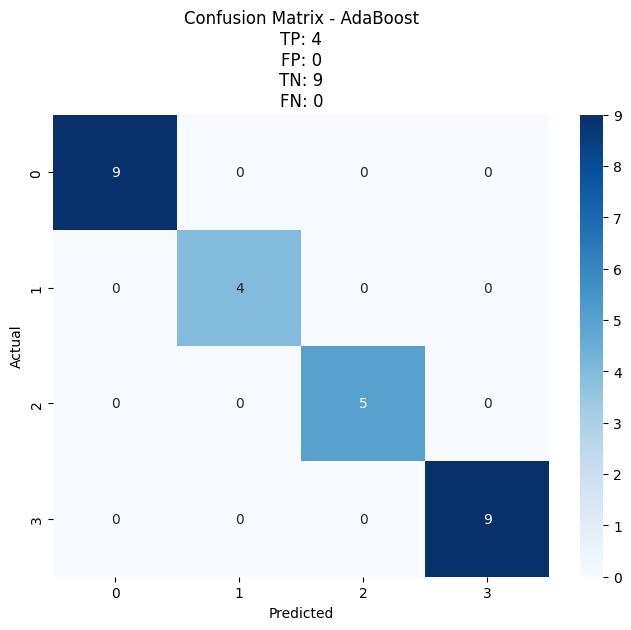

In [91]:
cm_ada = confusion_matrix(y_test, y_ada)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues')

# Get TP, FP, TN, FN values
tp = cm_ada[1, 1]
fp = cm_ada[0, 1]
tn = cm_ada[0, 0]
fn = cm_ada[1, 0]

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - AdaBoost\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))


5. Gradient Boosting

In [92]:
from sklearn.ensemble import GradientBoostingClassifier


GB_model = []
results = []

# Define parameters
n_estimators = [100,250, 500]
learning_rates = [0.1, 0.33, 0.5, 1.0]
max_depths = [3,  5, 7, 9]

# Create and train the Gradient Boosting models
for n_estimator in n_estimators:
    for learning_rate in learning_rates:
        for max_depth in max_depths:
            GB = GradientBoostingClassifier(n_estimators=n_estimator, learning_rate=learning_rate, max_depth=max_depth, random_state=1)
            GB.fit(x_train, y_train)
            GB_model.append(GB)

            y_pred = GB.predict(x_test)
            report = classification_report(y_test, y_pred, output_dict=True)
            accuracy_test = GB.score(x_train, y_train)
            accuracy_test = report['accuracy']
            recall = report['macro avg']['recall']
            results.append({'Model': str(GB), 'Train Accuracy': accuracy_test, 'Test Accuracy': accuracy_test, 'Recall': recall})

# Create DataFrame from results
df_GB = pd.DataFrame(results)
# Sort DataFrame by Recall in descending order
df_GB_sorted = df_GB.sort_values(by=['Recall', 'Test Accuracy', 'Train Accuracy'], ascending=False)

# Print the sorted DataFrame
df_GB_sorted[:5]

,Model,Train Accuracy,Test Accuracy,Recall
0,GradientBoostingClassifier(random_state=1),1.0,1.0,1.0
1,"GradientBoostingClassifier(max_depth=5, random...",1.0,1.0,1.0
2,"GradientBoostingClassifier(max_depth=7, random...",1.0,1.0,1.0
3,"GradientBoostingClassifier(max_depth=9, random...",1.0,1.0,1.0
5,"GradientBoostingClassifier(learning_rate=0.33,...",1.0,1.0,1.0


In [93]:
top_GB = df_GB_sorted[:2]

In [94]:
model_index = 0
GB_model_model = GB_model[model_index]
GB_model_model

GradientBoostingClassifier(random_state=1)

In [95]:
#verification
GB_m = GB_model_model
GB_m.fit(x_train, y_train)
y_gb = GB_m.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_gb))


                  precision    recall  f1-score   support

      PeopleSoft       1.00      1.00      1.00         9
React developers       1.00      1.00      1.00         4
  SQL developers       1.00      1.00      1.00         5
         WorkDay       1.00      1.00      1.00         9

        accuracy                           1.00        27
       macro avg       1.00      1.00      1.00        27
    weighted avg       1.00      1.00      1.00        27



Text(0.5, 1.0, 'Confusion Matrix - Gradient Boosting technique\nTP: 4\nFP: 0\nTN: 9\nFN: 0')

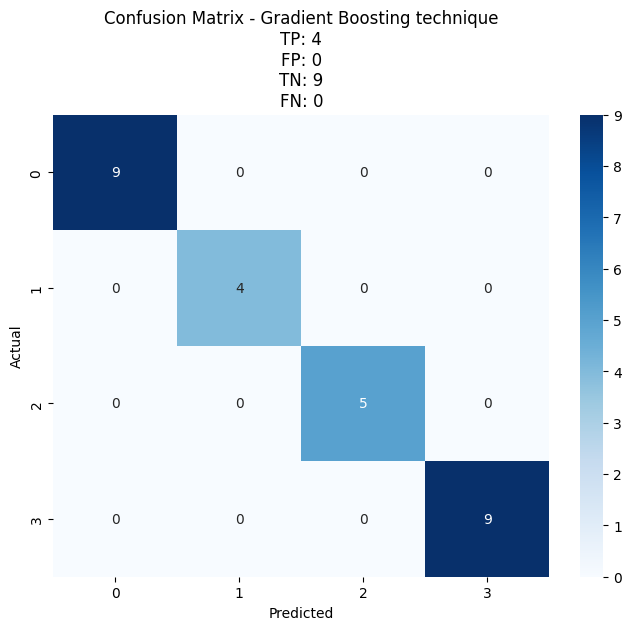

In [96]:
cm_GB = confusion_matrix(y_test, y_gb)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_GB, annot=True, fmt='d', cmap='Blues')

# Get TP, FP, TN, FN values
tp = cm_GB[1, 1]
fp = cm_GB[0, 1]
tn = cm_GB[0, 0]
fn = cm_GB[1, 0]

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting technique\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))


6. KNN

In [97]:
from sklearn.neighbors import KNeighborsClassifier


KNN_model = []
results = []

# Define parameters
n_neighbors = [3, 5, 7, 9]
weights = ['uniform', 'distance']

# Create and train the KNN models
for n_neighbor in n_neighbors:
    for weight in weights:
        KNN = KNeighborsClassifier(n_neighbors=n_neighbor, weights=weight)
        KNN.fit(x_train, y_train)
        KNN_model.append(KNN)

        y_pred = KNN.predict(x_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy_train = KNN.score(x_train,y_train)
        accuracy_test = report['accuracy']
        recall = report['macro avg']['recall']
        results.append({'Model': str(KNN), 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'Recall': recall})

# Create DataFrame from results
df_KNN = pd.DataFrame(results)
# Sort DataFrame by Recall in descending order
df_KNN_sorted = df_KNN.sort_values(by=['Recall', 'Test Accuracy', 'Train Accuracy'], ascending=False)

# Print the sorted DataFrame
df_KNN_sorted[:5]

,Model,Train Accuracy,Test Accuracy,Recall
1,"KNeighborsClassifier(n_neighbors=3, weights='d...",1.000000,1.000000,1.000000
0,KNeighborsClassifier(n_neighbors=3),0.961538,1.000000,1.000000
3,KNeighborsClassifier(weights='distance'),1.000000,0.925926,0.944444
5,"KNeighborsClassifier(n_neighbors=7, weights='d...",1.000000,0.925926,0.944444
7,"KNeighborsClassifier(n_neighbors=9, weights='d...",1.000000,0.925926,0.944444


In [98]:
model_index = 1
KNN_best_model = KNN_model[model_index]
KNN_best_model

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [99]:
k_nn  = KNN_best_model
k_nn.fit(x_train, y_train)
y_knn = k_nn.predict(x_test)
print(classification_report(y_test,y_knn))

                  precision    recall  f1-score   support

      PeopleSoft       1.00      1.00      1.00         9
React developers       1.00      1.00      1.00         4
  SQL developers       1.00      1.00      1.00         5
         WorkDay       1.00      1.00      1.00         9

        accuracy                           1.00        27
       macro avg       1.00      1.00      1.00        27
    weighted avg       1.00      1.00      1.00        27



In [100]:
top_KNN = df_KNN_sorted[:2]

Text(0.5, 1.0, 'Confusion Matrix - KNN\nTP: 4\nFP: 0\nTN: 9\nFN: 0')

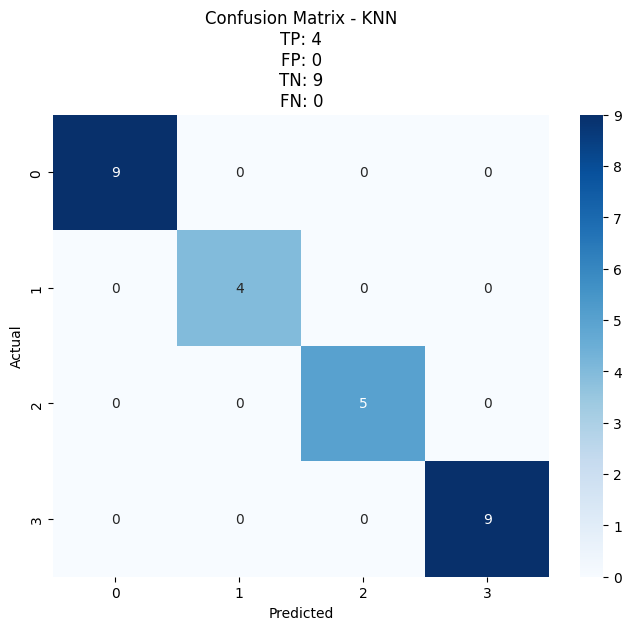

In [101]:
cm_knn = confusion_matrix(y_test, y_knn)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')

# Get TP, FP, TN, FN values
tp = cm_knn[1, 1]
fp = cm_knn[0, 1]
tn = cm_knn[0, 0]
fn = cm_knn[1, 0]

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))


7. SVM

In [102]:
from sklearn.svm import SVC

SVM_model = []
results = []
# Define parameters
C_values = [0.1, 1, 10, 100, 500, 1000]
kernels = ['linear', 'rbf']

# Create and train the SVM models
for C_value in C_values:
    for kernel in kernels:
        SVM = SVC(C=C_value, kernel=kernel, random_state=1)
        SVM.fit(x_train, y_train)
        SVM_model.append(SVM)

        y_pred = SVM.predict(x_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy_train = SVM.score(x_train, y_train)
        accuracy_test = report['accuracy']
        recall = report['macro avg']['recall']
        results.append({'Model': str(SVM), 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'Recall': recall})

# Create DataFrame from results
df_SVM = pd.DataFrame(results)

# Sort DataFrame by Recall in descending order
df_SVM_sorted = df_SVM.sort_values(by=['Recall', 'Test Accuracy', 'Train Accuracy'], ascending=False)

# Print the sorted DataFrame
df_SVM_sorted[:5]


,Model,Train Accuracy,Test Accuracy,Recall
2,"SVC(C=1, kernel='linear', random_state=1)",1.0,0.962963,0.95
4,"SVC(C=10, kernel='linear', random_state=1)",1.0,0.962963,0.95
6,"SVC(C=100, kernel='linear', random_state=1)",1.0,0.962963,0.95
8,"SVC(C=500, kernel='linear', random_state=1)",1.0,0.962963,0.95
10,"SVC(C=1000, kernel='linear', random_state=1)",1.0,0.962963,0.95


In [103]:
top_SVM = df_SVM_sorted[:2]

In [104]:
model_index = 2
SVM_best_model = SVM_model[model_index]
SVM_best_model

SVC(C=1, kernel='linear', random_state=1)

In [105]:
#verification
svm_m = SVM_best_model
svm_m.fit(x_train, y_train)
y_svm = svm_m.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_svm))

                  precision    recall  f1-score   support

      PeopleSoft       1.00      1.00      1.00         9
React developers       0.80      1.00      0.89         4
  SQL developers       1.00      0.80      0.89         5
         WorkDay       1.00      1.00      1.00         9

        accuracy                           0.96        27
       macro avg       0.95      0.95      0.94        27
    weighted avg       0.97      0.96      0.96        27



Text(0.5, 1.0, 'Confusion Matrix - SVM\nTP: 4\nFP: 0\nTN: 9\nFN: 0')

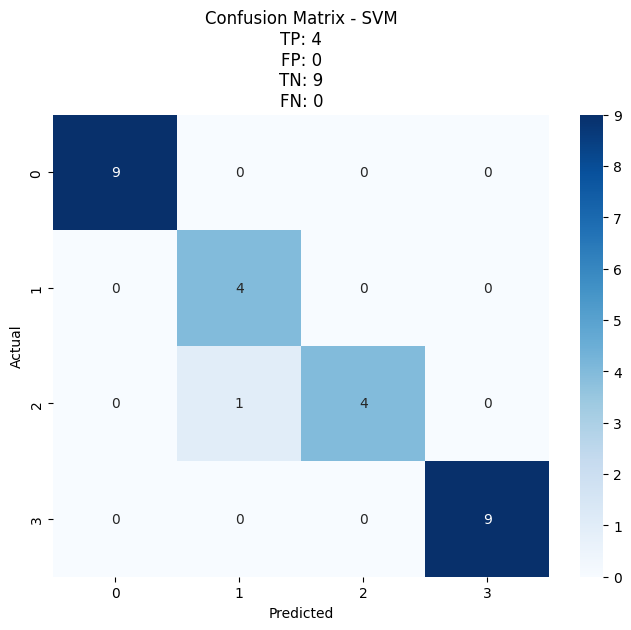

In [106]:
cm_svm = confusion_matrix(y_test, y_svm)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')

# Get TP, FP, TN, FN values
tp = cm_svm[1, 1]
fp = cm_svm[0, 1]
tn = cm_svm[0, 0]
fn = cm_svm[1, 0]

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))


8. ANN

In [107]:
from sklearn.neural_network import MLPClassifier

ANN_model = []
results = []

# Define parameters
hidden_layer_sizes = [(100,), (100, 50), (200, 100, 50)]
activation_functions = ['relu', 'tanh', 'logistic']

# Create and train the ANN models
for hidden_layer_size in hidden_layer_sizes:
    for activation_function in activation_functions:
        ANN = MLPClassifier(hidden_layer_sizes=hidden_layer_size, activation=activation_function, random_state=1)
        ANN.fit(x_train, y_train)
        ANN_model.append(ANN)

# Generate classification report for each model

        y_pred = ANN.predict(x_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy_train = ANN.score(x_train,y_train)
        accuracy = report['accuracy']
        recall = report['macro avg']['recall']
        results.append({'Model': str(ANN), 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'Recall': recall})

# Create DataFrame from results
df_ANN = pd.DataFrame(results)

# Sort DataFrame by Recall in descending order
df_ANN_sorted = df_ANN.sort_values(by=['Recall', 'Test Accuracy', 'Train Accuracy'], ascending=False)

# Print the sorted DataFrame
df_ANN_sorted[:5]


,Model,Train Accuracy,Test Accuracy,Recall
0,MLPClassifier(random_state=1),1.0,0.851852,0.95
1,"MLPClassifier(activation='tanh', random_state=1)",1.0,0.851852,0.95
2,"MLPClassifier(activation='logistic', random_st...",1.0,0.851852,0.95
3,"MLPClassifier(hidden_layer_sizes=(100, 50), ra...",1.0,0.851852,0.95
4,"MLPClassifier(activation='tanh', hidden_layer_...",1.0,0.851852,0.95


In [108]:
top_ANN = df_ANN_sorted[:2]

In [109]:
model_index = 2
ANN_best_model = ANN_model[model_index]
ANN_best_model

MLPClassifier(activation='logistic', random_state=1)

In [110]:
ANN_best_model.fit(x_train,y_train)
y_ann = ANN_best_model.predict(x_test)
print(classification_report(y_test,y_ann))

                  precision    recall  f1-score   support

      PeopleSoft       1.00      1.00      1.00         9
React developers       0.80      1.00      0.89         4
  SQL developers       1.00      0.80      0.89         5
         WorkDay       1.00      1.00      1.00         9

        accuracy                           0.96        27
       macro avg       0.95      0.95      0.94        27
    weighted avg       0.97      0.96      0.96        27



Text(0.5, 1.0, 'Confusion Matrix - ANN\nTP: 4\nFP: 0\nTN: 9\nFN: 0')

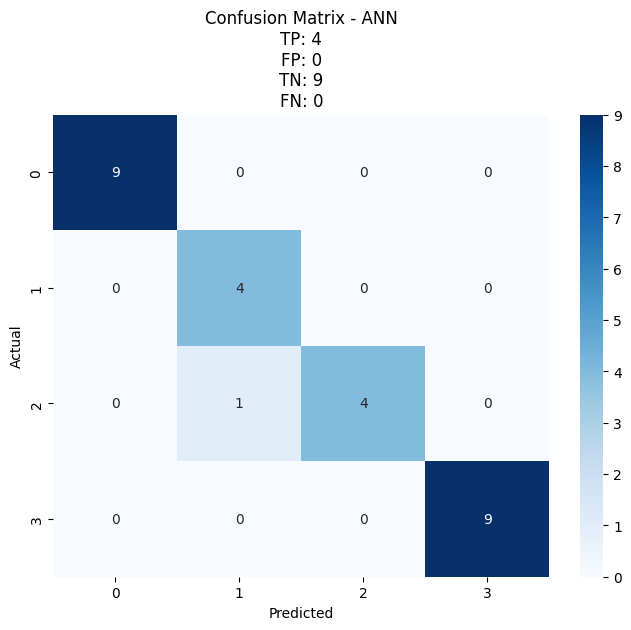

In [119]:
cm_ann = confusion_matrix(y_test, y_ann)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues')

# Get TP, FP, TN, FN values
tp = cm_ann[1, 1]
fp = cm_ann[0, 1]
tn = cm_ann[0, 0]
fn = cm_ann[1, 0]

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ANN\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))


In [112]:
dataframes = [top_logreg, top_DT, top_RF, top_ada, top_GB, top_KNN, top_SVM, top_ANN]
df_combined = pd.concat(dataframes)
df_combined

,Model,Train Accuracy,Test Accuracy,Recall
2,"LogisticRegression(C=5, random_state=1)",1.000000,0.962963,0.950000
3,"LogisticRegression(C=10, random_state=1)",1.000000,0.962963,0.950000
40,"DecisionTreeClassifier(max_depth=3, max_leaf_n...",0.942308,0.925926,0.944444
41,"DecisionTreeClassifier(max_depth=3, max_leaf_n...",0.942308,0.925926,0.944444
8,"RandomForestClassifier(max_depth=10, min_sampl...",1.000000,0.962963,0.972222
14,"RandomForestClassifier(max_depth=15, min_sampl...",1.000000,0.962963,0.972222
0,"AdaBoostClassifier(learning_rate=0.1, random_s...",1.000000,1.000000,1.000000
1,"AdaBoostClassifier(learning_rate=0.33, random_...",1.000000,1.000000,1.000000
0,GradientBoostingClassifier(random_state=1),1.000000,1.000000,1.000000
1,"GradientBoostingClassifier(max_depth=5, random...",1.000000,1.000000,1.000000


In [113]:
# Sorting by the best recall rate and then by test accuracy and next by traina accuracy
# index is kept same to pull the model number straight

df_sorted = df_combined.sort_values(by=['Recall', 'Test Accuracy', 'Train Accuracy'], ascending=False)
df_sorted

,Model,Train Accuracy,Test Accuracy,Recall
0,"AdaBoostClassifier(learning_rate=0.1, random_s...",1.000000,1.000000,1.000000
1,"AdaBoostClassifier(learning_rate=0.33, random_...",1.000000,1.000000,1.000000
0,GradientBoostingClassifier(random_state=1),1.000000,1.000000,1.000000
1,"GradientBoostingClassifier(max_depth=5, random...",1.000000,1.000000,1.000000
1,"KNeighborsClassifier(n_neighbors=3, weights='d...",1.000000,1.000000,1.000000
0,KNeighborsClassifier(n_neighbors=3),0.961538,1.000000,1.000000
8,"RandomForestClassifier(max_depth=10, min_sampl...",1.000000,0.962963,0.972222
14,"RandomForestClassifier(max_depth=15, min_sampl...",1.000000,0.962963,0.972222
2,"LogisticRegression(C=5, random_state=1)",1.000000,0.962963,0.950000
3,"LogisticRegression(C=10, random_state=1)",1.000000,0.962963,0.950000


In [114]:
print(KNN_best_model)

KNeighborsClassifier(n_neighbors=3, weights='distance')


In [115]:
vectorizer = tfidf


In [116]:
import pickle 
pickle_out = open("vectorizer.pkl", mode = "wb") #opened for writing in binary mode
pickle.dump(vectorizer, pickle_out) 
pickle_out.close()

In [117]:
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") #opened for writing in binary mode
pickle.dump(KNN_best_model, pickle_out) 
pickle_out.close()

In [118]:
vectorizer

TfidfVectorizer(stop_words='english', sublinear_tf=True)